## DSIR Part 1 

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import t

from sklearn.preprocessing import normalize
from sklearn.model_selection import GridSearchCV



In [ ]:
#Reading in header 

text_file = open('cancer/field_names.txt', "r")
header = text_file.read().split("\n")

In [18]:
cancer = pd.read_csv('https://gist.githubusercontent.com/jeff-boykin/b5c536467c30d66ab97cd1f5c9a3497d/raw/5233c792af49c9b78f20c35d5cd729e1307a7df7/breast-cancer.csv',
                     header=None, names=header)
cancer.head(2)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


When I actually model with this dataset, I will normalize the data, but I will leave it as is for now 
for better data visualization

In [23]:
#cancer.iloc[:,10:20]

In [21]:
#Checking for missing values 

cancer.isnull().sum()

ID                            0
diagnosis                     0
radius_mean                   0
radius_sd_error               0
radius_worst                  0
texture_mean                  0
texture_sd_error              0
texture_worst                 0
perimeter_mean                0
perimeter_sd_error            0
perimeter_worst               0
area_mean                     0
area_sd_error                 0
area_worst                    0
smoothness_mean               0
smoothness_sd_error           0
smoothness_worst              0
compactness_mean              0
compactness_sd_error          0
compactness_worst             0
concavity_mean                0
concavity_sd_error            0
concavity_worst               0
concave_points_mean           0
concave_points_sd_error       0
concave_points_worst          0
symmetry_mean                 0
symmetry_sd_error             0
symmetry_worst                0
fractal_dimension_mean        0
fractal_dimension_sd_error    0
fractal_

In [19]:
cancer.columns

Index([u'ID', u'diagnosis', u'radius_mean', u'radius_sd_error',
       u'radius_worst', u'texture_mean', u'texture_sd_error', u'texture_worst',
       u'perimeter_mean', u'perimeter_sd_error', u'perimeter_worst',
       u'area_mean', u'area_sd_error', u'area_worst', u'smoothness_mean',
       u'smoothness_sd_error', u'smoothness_worst', u'compactness_mean',
       u'compactness_sd_error', u'compactness_worst', u'concavity_mean',
       u'concavity_sd_error', u'concavity_worst', u'concave_points_mean',
       u'concave_points_sd_error', u'concave_points_worst', u'symmetry_mean',
       u'symmetry_sd_error', u'symmetry_worst', u'fractal_dimension_mean',
       u'fractal_dimension_sd_error', u'fractal_dimension_worst'],
      dtype='object')

In [29]:
print('Smoothness Mean: ' + str(cancer.groupby('diagnosis').smoothness_mean.mean()))
print('Smoothness Median: ' + str(cancer.groupby('diagnosis').smoothness_mean.median()))

Smoothness Mean: diagnosis
B    2.000321
M    4.323929
Name: smoothness_mean, dtype: float64
Smoothness Median: diagnosis
B    1.8510
M    3.6795
Name: smoothness_mean, dtype: float64


In [30]:
print('Compactness Mean: ' + str(cancer.groupby('diagnosis').compactness_mean.mean()))
print('Compactness Median:'+ str(cancer.groupby('diagnosis').compactness_mean.median()))

Compactness Mean: diagnosis
B    0.021438
M    0.032281
Name: compactness_mean, dtype: float64
Compactness Median:diagnosis
B    0.01631
M    0.02859
Name: compactness_mean, dtype: float64


In [151]:
cancer_b = cancer[cancer.diagnosis == 'B']
cancer_m = cancer[cancer.diagnosis == 'M']

In [155]:
t_interval_95 = t.interval(0.95,
                           len(cancer_b['smoothness_mean'])-1,
                           loc=np.mean(cancer_b['smoothness_mean']),
                           scale=np.std(cancer_b['smoothness_mean'],ddof = 1)/(len(cancer_b['smoothness_mean']))**0.5)

print "We are 95% confident that the true mean value for smoothness mean of benign tumors is between " + str(t_interval_95[0]) + " and " + str(t_interval_95[1]) + "."

We are 95% confident that the true mean value for smoothness mean of benign tumors is between 1.92005325106 and 2.08058932597.


In [157]:
#We calcualted above that the median of the 'smoothness_mean' for benign tumors is 1.8510 
#this can also be thought of as the point estimate 
smoothness_mean_median_benign = 1.8510

Because our point estimate for the median of the 'smoothness mean'for benign tumors falls outside the 95% confidence 
interval for the mean value of the 'smoothness mean', we can say that they are statistically differnent for a p value of .05. 



In [156]:
tm_interval_95 = t.interval(0.95,
                           len(cancer_m['compactness_mean'])-1,
                           loc=np.mean(cancer_m['compactness_mean']),
                           scale=np.std(cancer_m['compactness_mean'],ddof = 1)/(len(cancer_b['compactness_mean']))**0.5)

print "We are 95% confident that the true mean value for compactness mean of malignant tumors is between " + str(tm_interval_95[0]) + " and " + str(tm_interval_95[1]) + "."

We are 95% confident that the true mean value for compactness mean of malignant tumors is between 0.0303628165857 and 0.034199513603.


In [159]:
compactness_mean_median_malignant = .02859

I've run the test again to see if compactness_mean 'median' and compactness_mean 'mean' are different for malignant tumors at a p value of .05 (95% confidence level) and found that they are. We can repeat this process for the other 6 relationships to see if they are stastically different as well. 

Below is a function that grabs random samples of any dataframe with replacement, the default number of samples is 100.


In [192]:
def get_bootstrap(df, n_samples = 100):
    df_dict = df.to_dict(orient = 'index')
    sample_keys = np.random.choice(can_dict.keys(), size = n_samples, replace = True)
    random_samples = []
    [random_samples.append(can_dict[x])for x in sample_keys]
    return random_samples

In [193]:
get_bootstrap(cancer)

[{'ID': 849014,
  'area_mean': 0.05395,
  'area_sd_error': 0.7582,
  'area_worst': 1.0170000000000001,
  'compactness_mean': 0.018930000000000002,
  'compactness_sd_error': 0.03391,
  'compactness_worst': 0.01521,
  'concave_points_mean': 30.88,
  'concave_points_sd_error': 186.8,
  'concave_points_worst': 2398.0,
  'concavity_mean': 0.01356,
  'concavity_sd_error': 0.001997,
  'concavity_worst': 27.32,
  'diagnosis': 'M',
  'fractal_dimension_mean': 0.2388,
  'fractal_dimension_sd_error': 0.2768,
  'fractal_dimension_worst': 0.07615,
  'perimeter_mean': 0.1479,
  'perimeter_sd_error': 0.09498,
  'perimeter_worst': 0.1582,
  'radius_mean': 19.81,
  'radius_sd_error': 22.15,
  'radius_worst': 130.0,
  'smoothness_mean': 5.865,
  'smoothness_sd_error': 112.4,
  'smoothness_worst': 0.006494,
  'symmetry_mean': 0.1512,
  'symmetry_sd_error': 0.315,
  'symmetry_worst': 0.5372,
  'texture_mean': 1260.0,
  'texture_sd_error': 0.09831000000000001,
  'texture_worst': 0.1027},
 {'ID': 921385,
  

## Exploratory Analysis 

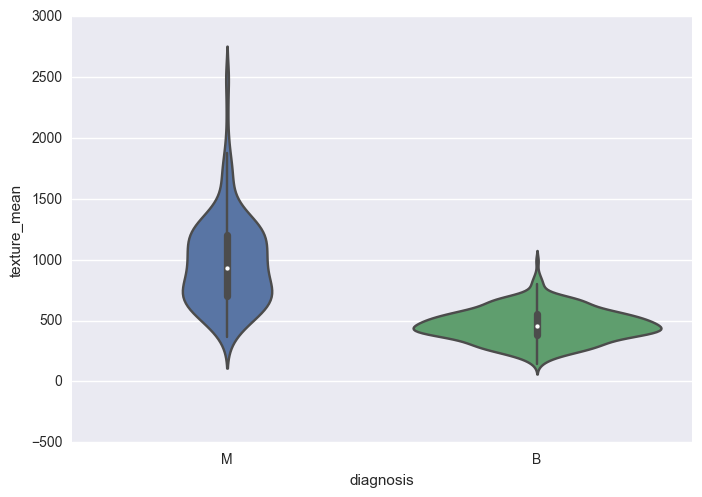

In [40]:
#I think these violin plots are a great way to easily identify  relationships between numeric and categorical data. We
#can quickly see below that malignant tumors have a much higher mean texture (and a wider range as well) 

sns.violinplot(x = 'diagnosis', y = 'texture_mean', data=cancer)
plt.show()

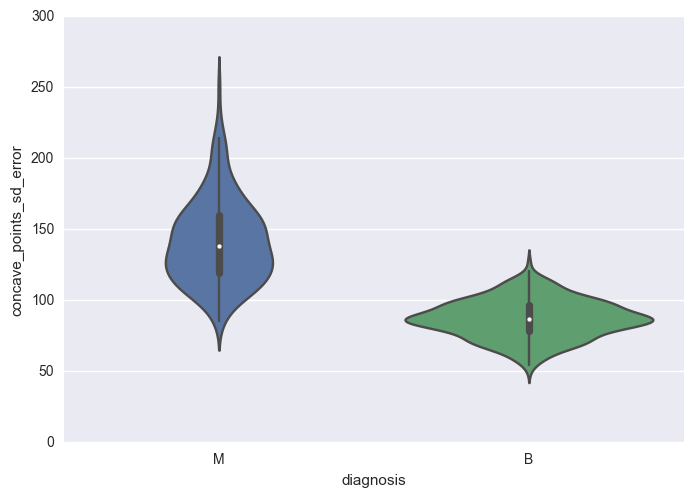

In [112]:
sns.violinplot(x = 'diagnosis', y = 'concave_points_sd_error', data=cancer)
plt.show()

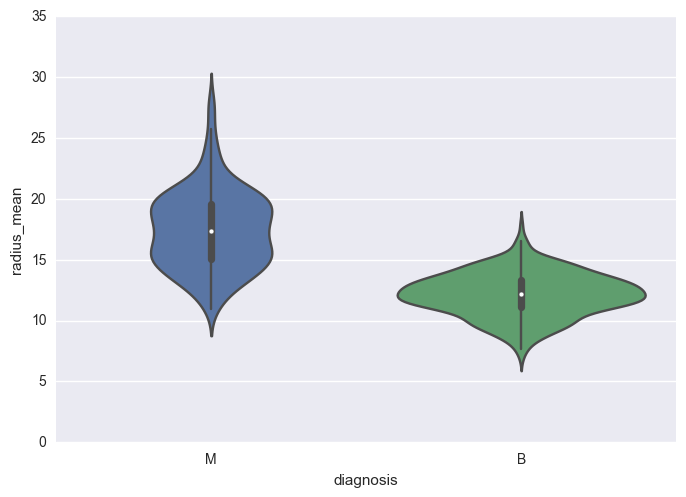

In [143]:
sns.violinplot(x = 'diagnosis', y = 'radius_mean', data=cancer)
plt.show()

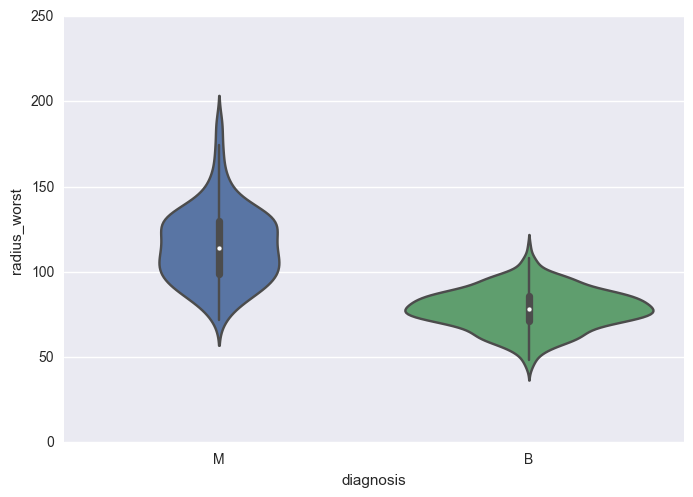

In [108]:
##Radius_worst seems to have a clear relationship with tumors being malignant. 

sns.violinplot(x = 'diagnosis', y = 'radius_worst', data=cancer)
plt.show()

In [55]:
cancer.groupby('diagnosis').describe()

ID   area_mean  area_sd_error  area_worst  \
diagnosis                                                              
B         count  3.570000e+02  357.000000     357.000000  357.000000   
          mean   2.654382e+07    0.062867       0.284082    1.220380   
          std    1.167397e+08    0.006747       0.112570    0.589180   
          min    8.913000e+03    0.051850       0.111500    0.360200   
          25%    8.746620e+05    0.058530       0.207300    0.795900   
          50%    9.089160e+05    0.061540       0.257500    1.108000   
          75%    8.812816e+06    0.065760       0.341600    1.492000   
          max    9.113205e+08    0.095750       0.881100    4.885000   
M         count  2.120000e+02  212.000000     212.000000  212.000000   
          mean   3.681805e+07    0.062680       0.609083    1.210915   
          std    1.378965e+08    0.007573       0.345039    0.483178   
          min    8.670000e+03    0.049960       0.193800    0.362100   
          25%    8.613450e+05    0.056598       0.390375    0.892825   
          50%    8.953665e+05    0.061575       0.547200    1.102500   
          75%    8.911290e+06    0.067075       0.757300    1.429250   
          max    9.112962e+08    0.097440       2.873000    3.568000   

                 compactness_mean  compactness_sd_error  compactness_worst  \
diagnosis                                                                    
B         count        357.000000            357.000000         357.000000   
          mean           0.021438              0.025997           0.009858   
          std            0.016352              0.032918           0.005709   
          min            0.002252              0.000000           0.000000   
          25%            0.011320              0.010990           0.006433   
          50%            0.016310              0.018400           0.009061   
          75%            0.025890              0.030560           0.011870   
          max            0.106400              0.396000           0.052790   
M         count        212.000000            212.000000         212.000000   
          mean           0.032281              0.041824           0.015060   
          std            0.018387              0.021603           0.005517   
          min            0.008422              0.011010           0.005174   
          25%            0.019662              0.026998           0.011415   
          50%            0.028590              0.037125           0.014205   
          75%            0.038910              0.050443           0.017497   
          max            0.135400              0.143800           0.040900   

                 concave_points_mean  concave_points_sd_error  \
diagnosis                                                       
B         count           357.000000               357.000000   
          mean             23.515070                87.005938   
          std               5.493955                13.527091   
          min              12.020000                50.410000   
          25%              19.580000                78.270000   
          50%              22.820000                86.920000   
          75%              26.510000                96.590000   
          max              41.780000               127.100000   
M         count           212.000000               212.000000   
          mean             29.318208               141.370330   
          std               5.434804                29.457055   
          min              16.670000                85.100000   
          25%              25.782500               119.325000   
          50%              28.945000               138.000000   
          75%              32.690000               159.800000   
          max              49.540000               251.200000   

                 concave_points_worst      ...        radius_worst  \
diagnosis                                  ...                       
B         coun

In [67]:
def run_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    conmat_1 = confusion_matrix(y_test, y_preds, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_test,y_preds))
    print(conmat_1)
    print(classification_report(y_test,y_preds))
    #return (accuracy_score(y_test,y_preds), (conmat_1), classification_report(y_test,y_preds))

def eval_model(model, x_test, y_true):
    y_pred = model.predict(x_test)
    conmat_1 = confusion_matrix(y_true, y_pred, labels=model.classes_)
    conmat_1 = pd.DataFrame(conmat_1, columns=model.classes_, index=model.classes_)
    print(accuracy_score(y_true,y_pred))
    print(conmat_1)
    print(classification_report(y_true,y_pred ))


In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

In [58]:
X = cancer.drop(['ID', 'diagnosis'], axis=1)
y = cancer['diagnosis']

In [60]:
Xn = normalize(X)

## Modeling 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(Xn,y, train_size = .75, random_state = 10)

In [66]:
model = GridSearchCV(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
                                            'penalty': ['l1', 'l2']})
model.fit(X_train, y_train)
print model.best_estimator_
print model.best_params_
print model.best_score_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{'penalty': 'l1', 'C': 100.0}
0.931924882629


In [69]:
lr = model.best_estimator_

In [70]:
#solid performance 

eval_model(lr, X_test, y_test)

0.923076923077
    B   M
B  85   6
M   5  47
             precision    recall  f1-score   support

          B       0.94      0.93      0.94        91
          M       0.89      0.90      0.90        52

avg / total       0.92      0.92      0.92       143



In [144]:
def l_get_co(model, X):
    coeffs = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs = coeffs.transpose()
    coeffs.columns = ['Coefficient']
    coeffs_t = pd.DataFrame(model.coef_, columns = X.columns)
    coeffs_t = coeffs_t.transpose()
    coeffs_t.columns = ['Abs_Coefficient']
    cos = pd.concat([coeffs, coeffs_t], axis=1)
    cos['Abs_Coefficient'] = cos['Abs_Coefficient'].abs()
    return cos.sort_values('Abs_Coefficient', ascending=False)

def tree_get_co(model, X):
    cos = pd.DataFrame(dtc.feature_importances_, index = X.columns, columns = ['Coefficient'])
    return cos.sort_values('Coefficient', ascending=False)

In [138]:
l_get_co(lr, X)

,Coefficient,Abs_Coefficient
radius_worst,-424.429000,424.429000
concave_points_mean,154.618304,154.618304
concave_points_sd_error,109.045604,109.045604
smoothness_sd_error,51.120320,51.120320
concave_points_worst,7.409651,7.409651
texture_mean,0.310476,0.310476
radius_mean,0.000000,0.000000
compactness_worst,0.000000,0.000000
fractal_dimension_sd_error,0.000000,0.000000
fractal_dimension_mean,0.000000,0.000000


In [148]:
dtc5 = DecisionTreeClassifier(max_depth = 5)

In [149]:
##solid results - similar to logistic regression. 

run_model(dtc5, X_train, X_test, y_train, y_test)

0.923076923077
    B   M
B  84   7
M   4  48
             precision    recall  f1-score   support

          B       0.95      0.92      0.94        91
          M       0.87      0.92      0.90        52

avg / total       0.92      0.92      0.92       143



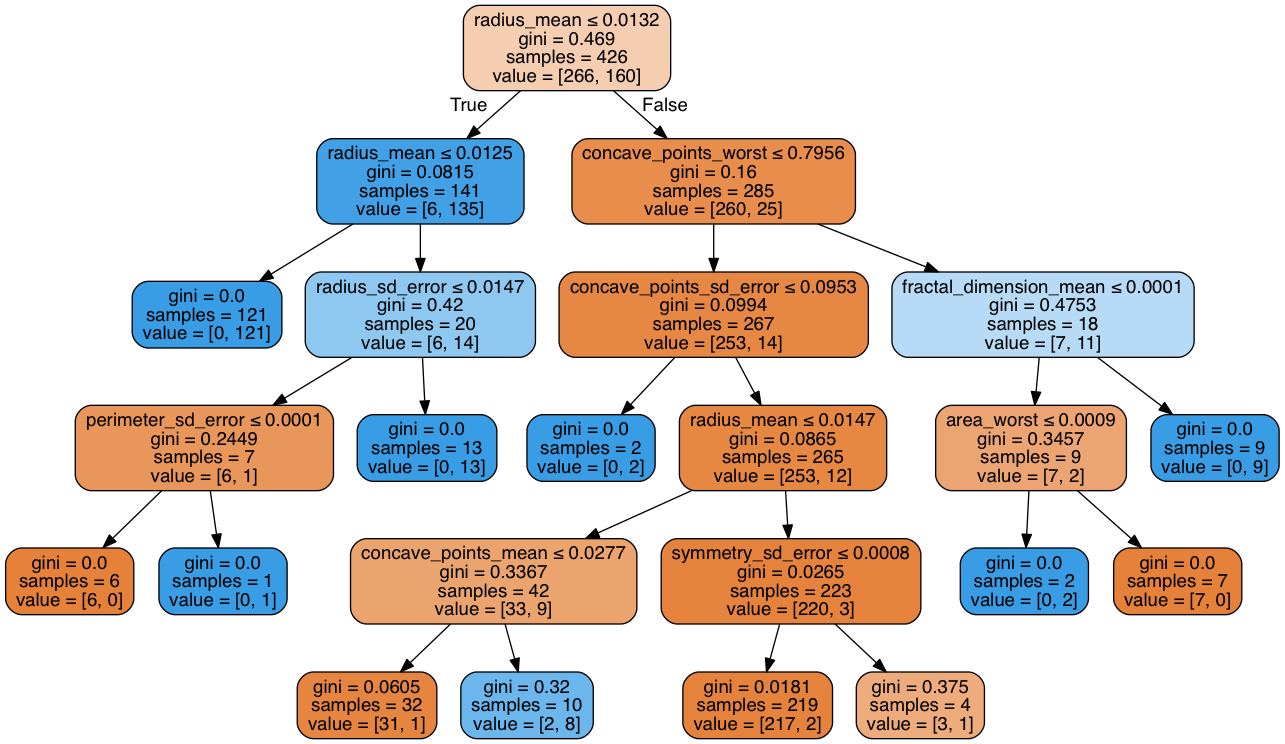

In [129]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [142]:
tree_get_co(dtc, X)

,Coefficient
radius_mean,0.785626
concave_points_worst,0.055634
concave_points_mean,0.047594
radius_sd_error,0.035335
fractal_dimension_mean,0.028774
concave_points_sd_error,0.019125
area_worst,0.016443
perimeter_sd_error,0.009060
symmetry_sd_error,0.002409
compactness_worst,0.000000


## Modeling analysis for technical audience  


* Logistic Regression  
    * In my logistic regression I control for overfitting by running a gridsearch on both l1 (lasso) and l2 (ridge) regularization penalties and different C values.  
    * Radius worst is the most important feature, which I identified by printing out the coefficients from my model.
    
* Decision Tree Classifier 
    * I controlled for overfitting in my decision tree classifier by limiting the depth of the branches of the tree to 5. 
    * For the decision tree,  'radius mean' is the most important feature. The classifier is quickly able to classify many tumors as benign - if you look at the left ost branch of my diagram - it uses just two branches and one criteria to classify many tumors with small 'radius mean' values as benign. 
    


Overall both models performed well - in fact they both achieved 92% accuracy and only misclassified 11 tumors in total. The logistic regression had 7 false negatives (and therefore 4 false positives) while the tree had 6 false negatives and 5 false positives. (In this case we are saying 'benign' is the positive)

Given the concept of a cancer test - I would be more concerned about missing cancerous tumors rather than falsely classifing a benign tumor as having cancer. While both have costs - telling a patient they are cancer free when they are not could lead to the death of the patient. Given that context I'd prefer my decision tree model - and would maybe consider changing the threshold so that the model only needs to be 40% sure the tumor is cancerous to classify it as malignant. 

## Explanation for non-technical audience

* I ran a desicion tree which looks at the characteristics of both cancerous and benign tumors and classifies previously unforeseen tumors based on the characteritics of the training data set. 

* For example my model considers 'radius_mean' of a cell to be the most important feature for classifying the tumor. If the mean radius of the cells in the image is relatively small - the model is much more likely to classifiy the tumor as benign. 

* The model also takes into account the std_error of the cell's radius. If the radius is small, but the std. error is large - it take into consideration other factors such as the amount of concave points to make a prediction. 

# DSIR Part 2 

In [194]:
s_data = pd.read_csv('https://gist.githubusercontent.com/jeff-boykin/9e1a450ef152604e6830ce70f4fc1be8/raw/4d42aebc2c2d3f7528a7769248720918e14f2e03/part-2-data.train.csv')

In [196]:
#looking at data myself 

s_data.head(2)

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk


In [197]:
s_data.ContractType.value_counts()

full_time    2978
part_time     578
Name: ContractType, dtype: int64

In [ ]:
#Example Student Code Submission 1 

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

## Feedback for submission 1 

* Good job selecting ContractType as one of your x variables, I definitly think contract type will affect salary. Can you think of other potential variables that could have an effect? 
* When writing your code, it can be helpful to make sure you are labeling the value you are trying to predict as your 'y' value. At the moment you have SalaryNormalized labeled as x1. So designating salary normalized as your 'y' and contract type as your 'x' will make sure you keep things straight!

* Be careful when selecting the amount of folds for your cross validation - at the moment you are designating one fold, but if all the data is in one group we can't test it against other portions of the data. Try cv = 5, next time!


In [202]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score


# Setup data for prediction
y = s_data.SalaryNormalized
X = pd.get_dummies(s_data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

-11822.1402313


//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
//anaconda/lib/python2.7/site-packages/sklea

In [ ]:


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

# Feedback for submission 2

* Good job selecting ContractType as one of your x variables, I definitly think contract type will affect salary. Can you think of other potential variables that could have an effect?
* It could be helpful to analyze the data before selecting your features for modeling. data.head() will show you the data - and you can make plots to examine relationships. Come by during office hours and we can discuss the different X&Y scatter plots. 
* What do you think your negative cross_val_score means? I think you could defintely improve your score if you added in other x values for your analysis. Maybe dummy variables for 'company' and 'category'
